In [1]:
import data
import binaries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
allkics = data.select_kics()
import kicanalysis
ka = kicanalysis.kic_analyze(allkics[:100])
#ka.lightcurve(allkics[300])

Found 2878 systems in catalog meeting criteria.


In [7]:
print ka.list_potentials()

[1026032, 2452440, 2019076]


Finding optimal frequency:
 - Estimated peak width = 0.00431
 - Using 5 steps per peak; omega_step = 0.000861
 - User-specified period range:  0.05 to 45
 - Computing periods at 145788 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


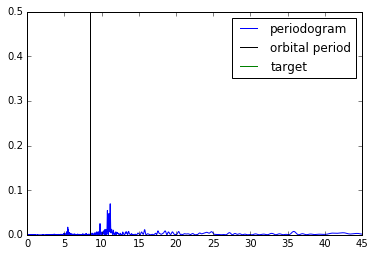

Finding optimal frequency:
 - Estimated peak width = 0.00918
 - Using 5 steps per peak; omega_step = 0.00184
 - User-specified period range:  0.05 to 45
 - Computing periods at 68339 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


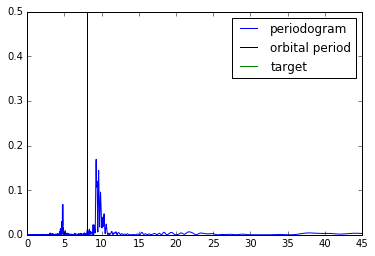

Finding optimal frequency:
 - Estimated peak width = 0.00442
 - Using 5 steps per peak; omega_step = 0.000884
 - User-specified period range:  0.05 to 45
 - Computing periods at 141967 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


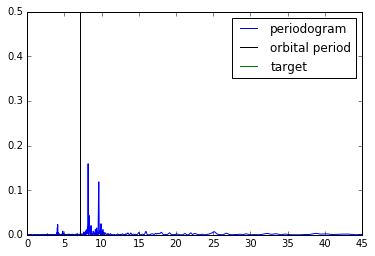

In [8]:
for kic in ka.potential_targets.keys():
    
    ka.plot_periodogram(kic)

In [16]:
import periodicity2
ka = kicanalysis.kic_analyze(allkics[:])
dict1 = ka.readfile('periodogram_periods_all_interp_0.65')
numbers = [12350008,9077796,6350020,9478836,3354616]

for kic in numbers:
    info = ka.get_info(kic)
    periods = periodicity2.Periodicity(info[0],info[1],info[2])
    phase_amp = periods.test_period(dict1[kic][0])
    #print len(phase_amp),[x[0] for x in phase_amp.itervalues()]
    print np.std([x[0] for x in phase_amp.itervalues()])
ka.eclipsewidth = .7
ka.lightcurve(9478836)
#print len(ka.get_info(allkics[300])[0]),len(ka.get_info(allkics[300])[1])
#print len(ka.get_info(allkics[100])[0]),len(ka.get_info(allkics[100])[1])
#print len(ka.get_info(allkics[200])[0]),len(ka.get_info(allkics[200])[1])


TypeError: test_period() takes exactly 3 arguments (2 given)

441


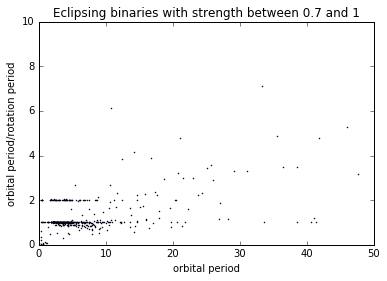

In [15]:
ka = kicanalysis.kic_analyze(allkics[:])
ka.better_periods(files = ['periodogram_periods_all_interp_0.7','autocor_periods_all_interp_0.7'])
ka.plot_results(dictionary = ka.better_periods, minstrength = .7, xlim = (0,50))
#ka.write(ka.better_periods,'better','0.7')
#ka.test_data()

In [ ]:
print dict1[allkics[numbers[13]]]
print dict1[allkics[numbers[23]]]

print dict1[allkics[numbers[0]]]
print dict1[allkics[numbers[2]]]

In [ ]:
func = lambda par, t,x: par[0]*np.cos(2*np.pi/testperiod*t+par[1])-x
print np.atleast_1d(func(*(([.1,0][:2],) + args)))

In [ ]:
ka = kicanalysis.kic_analyze(allkics[:])
dict1 = ka.readfile('periodogram_periods_all_cut_0.8')
dict2 = ka.readfile('periodogram_periods_all_interp_0.8')
ka.histogram(np.array([[dict1,dict2],['periodogram_periods_all_cut_0.8','periodogram_periods_all_interp_0.8']]))

In [ ]:
array = np.array([[{'z':30},{'m':20}],['c','h']])
print array
for x,y in np.nditer(array, flags=['external_loop','refs_ok'], order='F'):
    print x
    print y

In [ ]:
periodogram = {}
for kic in allkics:
 
    period, power = np.genfromtxt('periodograms_test'+str(kic), unpack = True)
    periodogram[kic]= (period, power)

print periodogram[allkics[1]]

In [ ]:
print [1,2,3,4][2:]

In [ ]:
import numpy as np
import data
import binaries
import matplotlib.pyplot as plt
import lightcurve
from interpacf import interpolated_acf, dominant_period

def period_power_dict(allkics, write = False, append = ''):
    period_power = {}
    best_periods = {}
    for n,kic in enumerate(allkics):
        binary=binaries.RealBinary(kic)

        period, power, best_period = binary.periodogram()
        period_power['kic'+str(kic)] = [period, power, binary.p_orb]
        where = np.abs(period - best_period).argmin()
        strength = power[where]
        best_periods['kic'+str(kic)] = [best_period, strength, binary.p_orb]
        
        
    #for printing
    if write:
        kics = []
        best_period = []
        strength = []
        p_orb = []
        for i,k in period_dict.iteritems():
            kics.append(i)
            best_period.append(k[0])
            strength.append(k[1])
            p_orb.append(k[2])
        array = np.array([[kics[0], best_period[0], strength[0], p_orb[0]]])
        for n in range(1,len(kics)):
            
            array = np.append(array,[[kics[n], best_period[n], strength[n], p_orb[n]]],axis=0)
        np.savetxt('best_periods'+append, array, fmt ='%.18s')
 
    print 'done with periodograms'
    return period_power, best_periods
allkics = data.select_kics()
print period_power_dict(allkics[:2])[1]

In [ ]:
period_power=[]
for n,kic in enumerate([34,64,37,44,87,65,34,45]):
    period_power.append(['kic'+str(kic)])
    period = [32,32,34,56,347,3462,57,54,64,23]
    for index in range(len(period)):
        period_power[n].append([period[index]])
print period_power
        

In [ ]:
## eventually should be changed to be object-oriented
import numpy as np
import data
import binaries
import matplotlib.pyplot as plt
import lightcurve
import pandas

def period_power_dict(allkics):
    period_power={}
    for n,kic in enumerate(allkics):
        binary=binaries.RealBinary(kic)
        try:
            period,power = binary.periodogram()
            period_power['kic'+str(kic)] = [period,power,binary.p_orb]
        #need to deal with exception handling
        except ZeroDivisionError:
            print 'ZeroDivisionError', 'kic'+str(kic)
            pass
    '''    
    to make a file containing all of the periodogram data for further analysis
    this makes a file with lines: 'kic#', [period list], [power list], orbital period
    f = open('periodograms', 'w')
    for i,k period_power.iteritems():
        f.write(i)
        for x in k:
            f.write(','+str(x))
        f.write(' \n')
    f.close() 
        
    '''    
    return period_power
    

def strongest_periods(period_power_dict):
    strongest_periods = {}
    for i,k in period_power_dict.iteritems():
        #this goes over each [period],[power]
        period = np.array(k[0])
        power = np.array(k[1])
        p_orb = np.array(k[2])
        period_mask = []
        for j in range(len(period)):
            if period[j]<45.0 and period[j]>.025:
                period_mask.append(j)
        index = np.where(power == max(power[period_mask]))
        strongest_periods[str(i)]=(float(period[index[0]]), float(power[index[0]]), float(p_orb))
    return strongest_periods


allkics = data.select_kics()
#print allkics
strongest_period_list = strongest_periods(period_power_dict(allkics[:2]))

f = open('testing', 'w')
for i,k in strongest_period_list.iteritems():
    f.write(i)
    for x in range(3):
        f.write(','+str(k[x]))
    f.write('\n')
f.close()   

'''

p_rot = []
p_orb = []
for i,k in strongest_period_list.iteritems():
    
    p_orb_rot.append(k[2]/k[0])
    p_orb.append(k[2])

plt.plot(p_orb_rot, p_orb, linestyle = 'none', marker='o', markersize=4)
#plt.xlim(0,10)
plt.show()
'''


In [ ]:
print allkics[1451]

In [ ]:
p_orb_rot=[]
p_orb = []
for i,k in strongest_period_list.iteritems():
    #print i,'period:'+str(k[0]),'power:'+str(k[1]), 'p_orb:'+str(k[2])
    
    p_orb_rot.append(k[2]/k[0])
    p_orb.append(k[2])


#for n in range(len(p_rot)):
plt.plot(p_orb_rot, p_orb, linestyle = 'none', marker='o', markersize=4)
plt.xlim(0,10)
#plt.ylim(0,5)
plt.show()

In [ ]:
a = [0,2,5,6]
b = [5,3,2]
c = [1,1,1]
a+b+c